In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [ ]:
# USeast = MultiModelLargeEnsemble(models=['CanESM5','cesm_lens',
#                                          'MIROC6','MPI-ESM1-2-LR','EC-Earth3'],
#                                  variable='tas', granularity='day', lat=41.3, 
#                                  lon=-72.5,bucket='climateai_data_repository', 
#                                  path='tmp/internal_variability',
#                                  return_period=10, hist_slice=slice('1995','2014'),
#                                  coarsen=7, conseq_days=1, rolling_average = 10,
#                                  load=True)

### sensitivity testing
using model:internal ratio for testing the various parameters. When ratio > 1, model uncertainty dominates. When ratio < 1, internal variability dominates. 

### Return periods 

In [6]:
return_periods = [5,10,15,20,25,30]
test_return = []
for i in return_periods:
    USeast = MultiModelLargeEnsemble(models=['CanESM5','cesm_lens',
                                         'MIROC6','MPI-ESM1-2-LR','EC-Earth3'],
                                 variable='tas', granularity='day', lat=41.3, 
                                 lon=-72.5,bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 return_period=i, hist_slice=slice('1995','2014'),
                                 coarsen=7, conseq_days=1, rolling_average = 10,
                                 load=True)
    internal = USeast.extreme_internal
    test_return.append(internal)

In [8]:
test_return[0]

<xarray.Dataset>
Dimensions:            (time: 86, member: 58, model: 5)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 51 52 53 54 55 56 57
    member_id          (model, member) object 'r16i1p2f1' ... 'r3i1p1f1'
  * model              (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile           float64 0.9995
Data variables: (12/14)
    tas_occurance      (model, member, time) float64 nan nan nan ... nan nan nan
    model_le           (time) float64 nan nan nan nan nan ... nan nan nan nan
    internal_le        (time) float64 nan nan nan nan nan ... nan nan nan nan
    total_le           (time) float64 nan nan nan nan nan ... nan nan nan nan
    total_direct_le    (time) float64 nan nan nan nan nan ... nan nan nan nan
    internal_le_frac   (time) float64 nan nan nan nan nan ... nan nan nan nan
    ...                 ...
    internal_fit       float64 3.675e-05
    model_fit          (time) float64 nan nan nan nan nan ... nan nan nan nan
    total_fit          (time) float64 nan nan nan nan nan ... nan nan nan nan
    internal_fit_frac  (time) float64 nan nan nan nan nan ... nan nan nan nan
    model_fit_frac     (time) float64 nan nan nan nan nan ... nan nan nan nan
    total_direct_fit   (time) float64 nan nan nan nan nan ... nan nan nan nan

Text(0.5, 1.0, 'Varying Return Period')

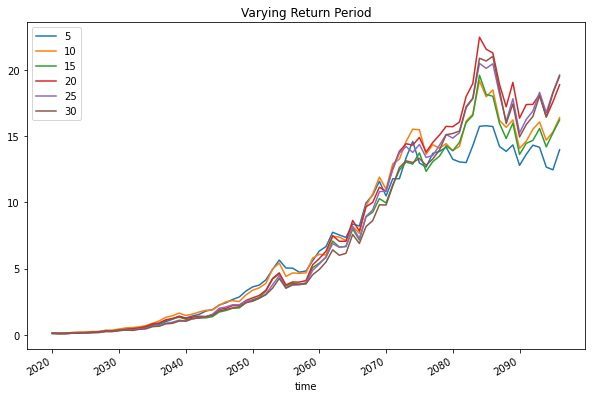

In [17]:
figure = plt.figure(figsize=(10,6))
return_periods = [5,10,15,20,25,30]
for r,i in zip(test_return,return_periods):
    (r.model_le/r.internal_le).plot(label=i)
plt.legend()
plt.title('Varying Return Period')

### Hist_slice

In [18]:
hist_slice_periods = [slice('1920','1940'),slice('1940','1960'),slice('1960','1980'),
                      slice('1990','2010'),slice('1995','2014'),slice('1930','1950')]
test_histslice = []
for i in hist_slice_periods:
    USeast = MultiModelLargeEnsemble(models=['CanESM5','cesm_lens',
                                         'MIROC6','MPI-ESM1-2-LR','EC-Earth3'],
                                 variable='tas', granularity='day', lat=41.3, 
                                 lon=-72.5,bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 return_period=10, hist_slice=i,
                                 coarsen=7, conseq_days=1, rolling_average = 10,
                                 load=True)
    internal = USeast.extreme_internal
    test_histslice.append(internal)

Text(0.5, 1.0, 'Varying Hist Slice Period')

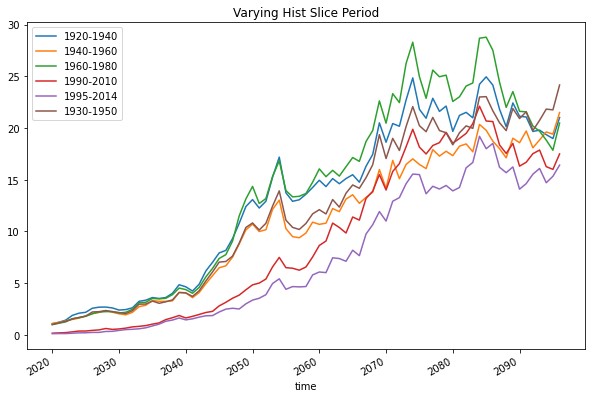

In [19]:
figure = plt.figure(figsize=(10,6))
hist_slice_periods = ['1920-1940','1940-1960','1960-1980',
                      '1990-2010','1995-2014','1930-1950']
for r,i in zip(test_histslice,hist_slice_periods):
    (r.model_le/r.internal_le).plot(label=i)
plt.legend()
plt.title('Varying Hist Slice Period')

### coarsen

In [20]:
coarsen = [2,3,4,5,6,7]
test_coarsen = []
for i in coarsen:
    USeast = MultiModelLargeEnsemble(models=['CanESM5','cesm_lens',
                                         'MIROC6','MPI-ESM1-2-LR','EC-Earth3'],
                                 variable='tas', granularity='day', lat=41.3, 
                                 lon=-72.5,bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 return_period=10, hist_slice=slice('1995','2014'),
                                 coarsen=i, conseq_days=1, rolling_average = 10,
                                 load=True)
    internal = USeast.extreme_internal
    test_coarsen.append(internal)

Text(0.5, 1.0, 'Varying Coarsen (days)')

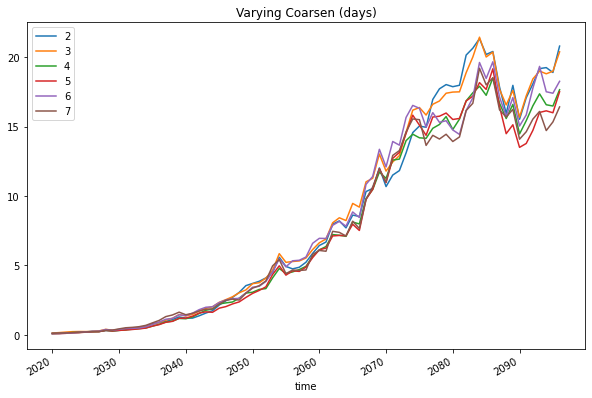

In [21]:
figure = plt.figure(figsize=(10,6))
coarsen = [2,3,4,5,6,7]
for r,i in zip(test_coarsen,coarsen):
    (r.model_le/r.internal_le).plot(label=i)
plt.legend()
plt.title('Varying Coarsen (days)')

### Consecutive days 

In [22]:
conseq = [1,2,3,4,5,6]
test_conseq = []
for i in conseq:
    USeast = MultiModelLargeEnsemble(models=['CanESM5','cesm_lens',
                                         'MIROC6','MPI-ESM1-2-LR','EC-Earth3'],
                                 variable='tas', granularity='day', lat=41.3, 
                                 lon=-72.5,bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 return_period=10, hist_slice=slice('1995','2014'),
                                 coarsen=7, conseq_days=i, rolling_average = 10,
                                 load=True)
    internal = USeast.extreme_internal
    test_conseq.append(internal)

Text(0.5, 1.0, 'Varying Consecutive Days')

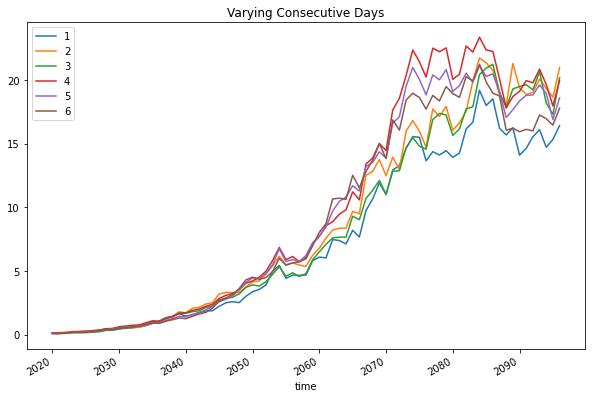

In [23]:
figure = plt.figure(figsize=(10,6))
conseq = [1,2,3,4,5,6]
for r,i in zip(test_conseq,conseq):
    (r.model_le/r.internal_le).plot(label=i)
plt.legend()
plt.title('Varying Consecutive Days')

### rolling average

In [24]:
rolling_average = [1,5,10,15,20,25]
test_rolling = []
for i in rolling_average:
    USeast = MultiModelLargeEnsemble(models=['CanESM5','cesm_lens',
                                         'MIROC6','MPI-ESM1-2-LR','EC-Earth3'],
                                 variable='tas', granularity='day', lat=41.3, 
                                 lon=-72.5,bucket='climateai_data_repository', 
                                 path='tmp/internal_variability',
                                 return_period=10, hist_slice=slice('1995','2014'),
                                 coarsen=7, conseq_days=1, rolling_average = i,
                                 load=True)
    internal = USeast.extreme_internal
    test_rolling.append(internal)

Text(0.5, 1.0, 'Varying Rolling Average')

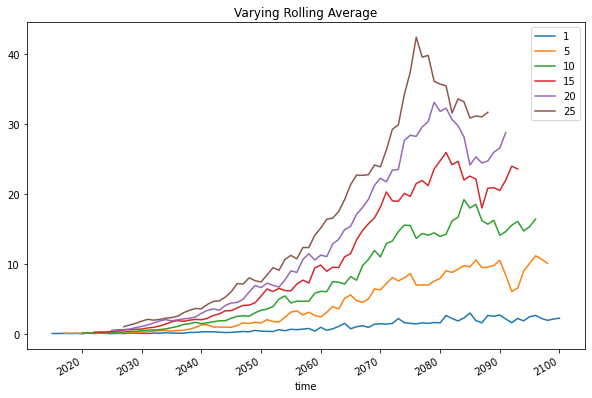

In [25]:
figure = plt.figure(figsize=(10,6))
rolling_average = [1,5,10,15,20,25]
for r,i in zip(test_rolling,rolling_average):
    (r.model_le/r.internal_le).plot(label=i)
plt.legend()
plt.title('Varying Rolling Average')